In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(nambeware)

In [3]:
str(nambeware)

'data.frame':	59 obs. of  4 variables:
 $ Type : Factor w/ 5 levels "Bowl","CassDish",..: 2 2 2 1 3 2 5 5 3 3 ...
 $ Diam : num  10.7 14 9 8 10 10.5 16 15 6.5 5 ...
 $ Time : num  47.6 63.1 58.8 34.9 55.5 ...
 $ Price: num  144 215 105 69 134 129 155 99 38.5 36.5 ...


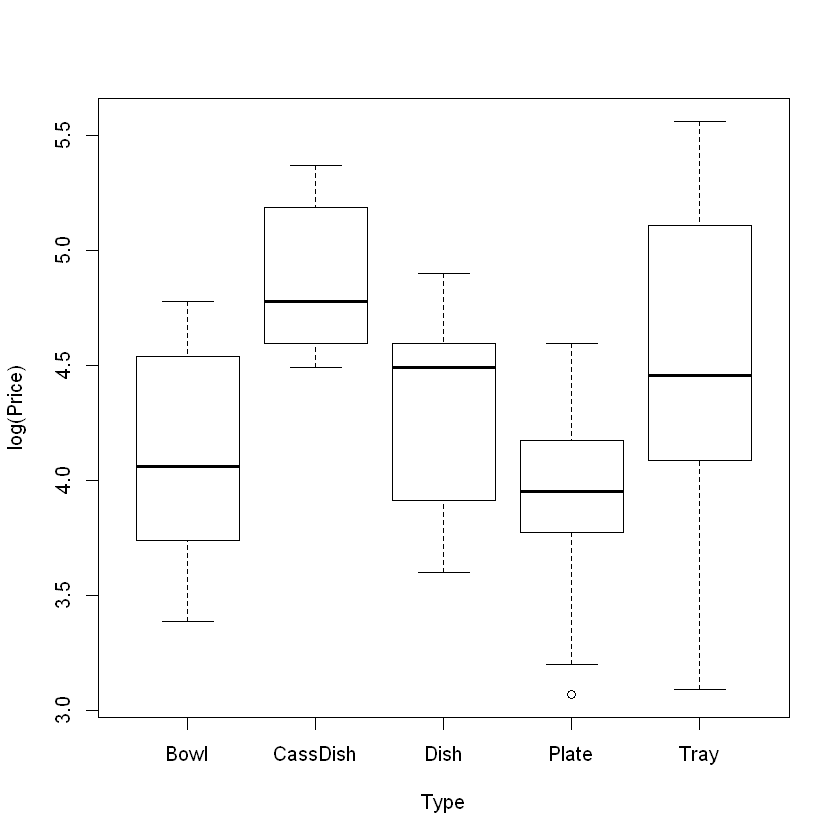

In [9]:
plot(log(Price) ~ Type, data=nambeware)

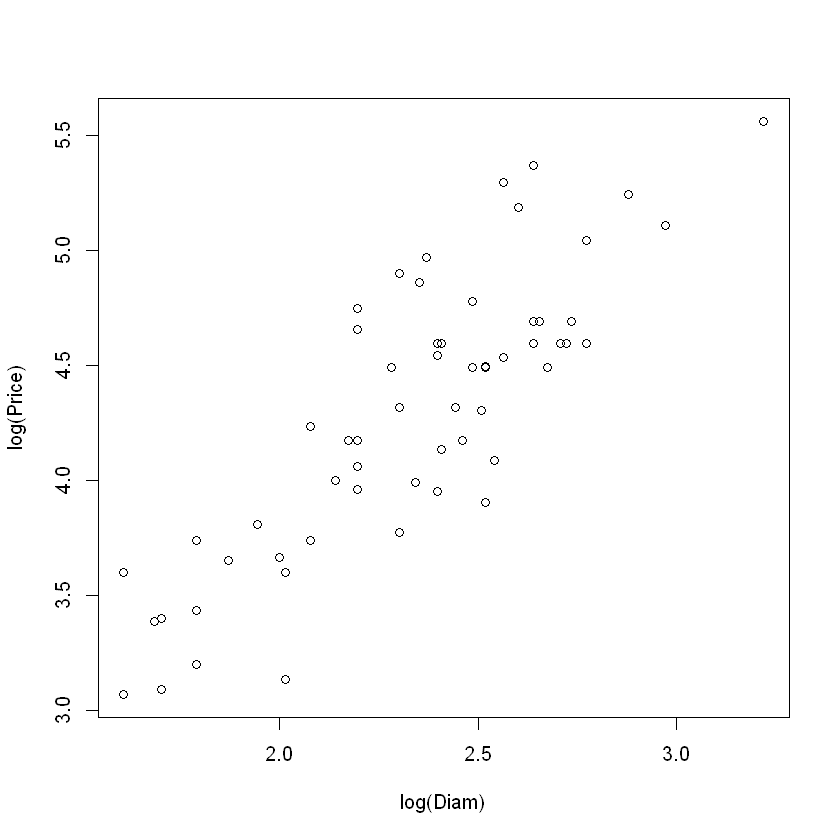

In [6]:
plot(log(Price) ~ log(Diam), data=nambeware)

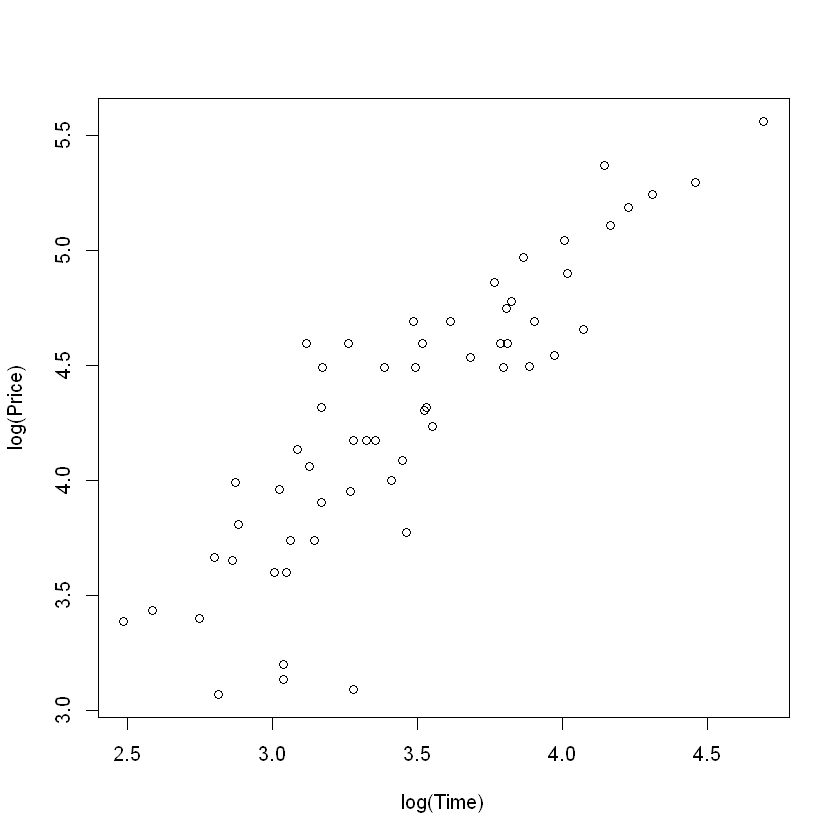

In [8]:
plot(log(Price) ~ log(Time), data=nambeware)

In [16]:
glm.1 <- glm(Price ~ (log(Diam) + log(Time))*Type, data=nambeware, family = inverse.gaussian(link="log"))

In [17]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.49325343,0.20939328,2.3556317,2.301291e-02
log(Diam),0.82639737,0.12572912,6.5728398,4.846804e-08
log(Time),0.56011599,0.09539463,5.8715674,5.210162e-07
TypeCassDish,0.50808378,1.31151391,0.3874025,7.003259e-01
TypeDish,-0.20351190,0.47380662,-0.4295252,6.696372e-01
TypePlate,1.46468200,0.70602510,2.0745466,4.390982e-02
TypeTray,-2.23133098,0.46667129,-4.7813762,1.977975e-05
log(Diam):TypeCassDish,-0.56694099,0.40464479,-1.4010831,1.682031e-01
log(Diam):TypeDish,-0.09979308,0.30650236,-0.3255867,7.462804e-01
log(Diam):TypePlate,0.60835202,0.19242161,3.1615577,2.840450e-03


In [18]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,58,0.28952562,NA,NA
log(Diam),1,0.199842751,57,0.08968287,742.165143,3.502278e-29
log(Time),1,0.038537460,56,0.05114541,143.118324,2.006776e-15
Type,4,0.029178601,52,0.02196681,27.090476,2.259470e-11
log(Diam):Type,4,0.005432720,48,0.01653409,5.043935,1.960325e-03
log(Time):Type,4,0.004093251,44,0.01244084,3.800323,9.714700e-03


In [22]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 1

[1] 1

[1] 0.0002827464

[1] 0.0002692699

Warning message in termplot(glm.1, partial.resid = TRUE):
"'model' appears to involve interactions: see the help page"


	Shapiro-Wilk normality test

data:  qr1
W = 0.98551, p-value = 0.7063


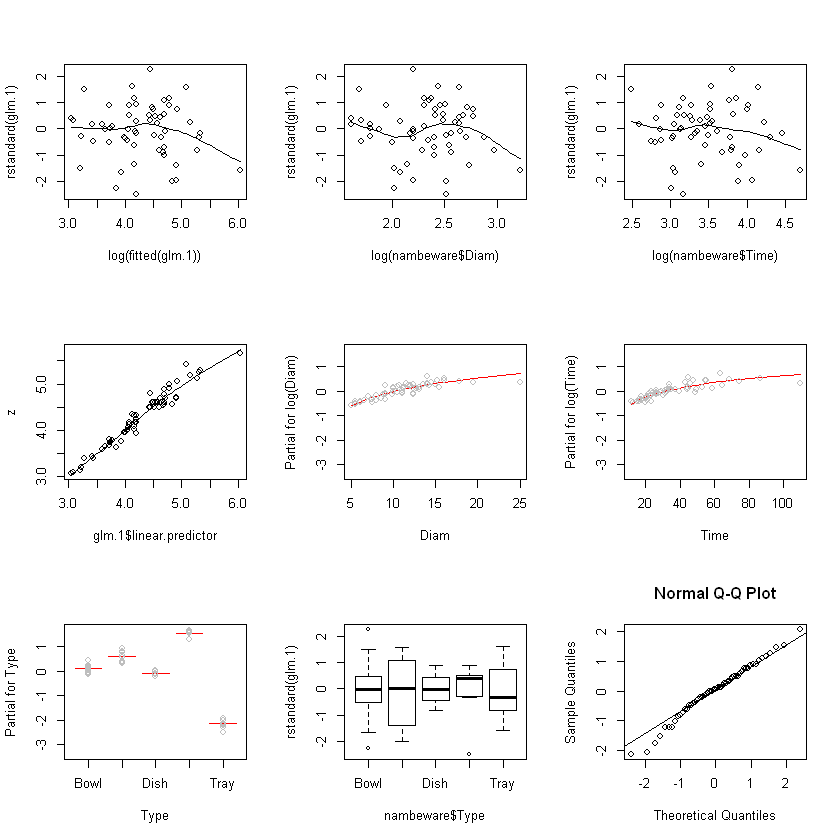

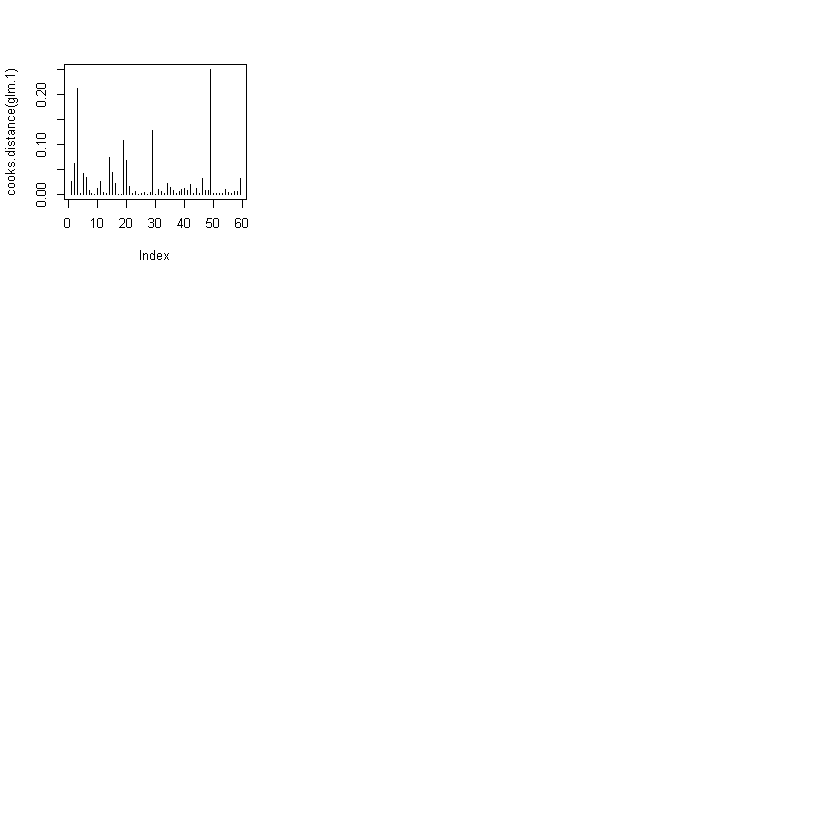

In [20]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ log(nambeware$Diam))
scatter.smooth(rstandard(glm.1) ~ log(nambeware$Time))
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
termplot(glm.1, partial.resid = TRUE)
plot(rstandard(glm.1) ~ nambeware$Type)
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
plot(cooks.distance(glm.1), type="h")
shapiro.test(qr1)

In [21]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_   dfb.lg(D)   dfb.lg(T)    dfb.TyCD    dfb.TypD    dfb.TypP 
          0           0           1           0           0           0 
   dfb.TypT dfb.l(D):TC dfb.l(D):TD dfb.l(D):TP dfb.l(D):TT dfb.l(T):TC 
          1           1           0           0           0           0 
dfb.l(T):TD dfb.l(T):TP dfb.l(T):TT       dffit       cov.r      cook.d 
          0           0           1           2           9           0 
        hat 
          2